In [285]:
import pandas as pd
import numpy as np
from ggplot import *
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
%matplotlib inline

### In Vino Veritas

Can a winemaker predict how a wine will be received based on the chemical properties of the wine? Are there chemical indicators that correlate more strongly with the perceived "quality" of a wine?

In this problem we'll examine the wine quality dataset hosted on the UCI website. This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this problem, we will only look at the data for red wine.

### Problem 1: Data Collection
Import only the data for red wine from the dataset repository. Build a pandas dataframe from the csv file and print the head. You might have to change the default delimiter used by the read_csv function in Pandas.

In [286]:
Wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
Wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


As in any machine learning problem, we have the feature data, usually labeled as X, and the target data, labeled Y. Every row in the matrix XX is a datapoint (i.e. a wine) and every column in X is a feature of the data (e.g. pH). For a classification problem, Y is a column vector containing the class of every datapoint.

We will use the quality column as our target variable. Save the quality column as a separate numpy array (labeled YY) and remove the quality column from the dataframe.

Also, we will simplify the problem to a binary world in which wines are either "bad" (score<7score<7) or "good" (score≥7)score≥7). Change the Y array accordingly such that it only contains zeros ("bad" wines) and ones ("good" wines). For example, if originally Y=[1,3,8,4,7]Y=[1,3,8,4,7], the new Y should be [0,0,1,0,1]

In [287]:
Y=Wine.quality.values
del Wine['quality']
Y = np.array([1 if y>=7 else 0 for y in Y])

In [288]:
X=Wine.as_matrix()
Y=list(Y)
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


### Problem 2: 
Unbalanced Classification Evaluation
In this section, we explore a number of different methods to predict the quality of a wine YY based on the recorded features XX. Formulated as a machine learning problem, we wish to predict the target YY as a function of the features XX.

Because we have defined YY as a binary variable (encoding bad as 0 and good as 1), this is a classification problem. In class, we have discussed several approaches to classifiction incuding decision trees, random forests, and Support Vector Machines (SVM).

For this problem, we will focus on random forests, but we will later in the Problem set invoke these other techniques. Recall from class that the random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

(a) In class, we saw that for a fixed set of data, a decision tree algorithm will generate a single fixed tree to perform a classification task. Describe how a random forest is built from individual decision trees. What are the sources of randomness in the process that are used to build a diverse set of decision trees?

YOUR ANSWER HERE.

(b) There are many ways to construct a random forest -- these differences in the method of construction are encoded as tuning parameters. As is often the case when our goal is to construct a good prediction, we can set these tuning parameters to obtain the best projected performance in a prediction task. One of the most important tuning parameters in building a random forest is the number of trees to construct.

Here, you should apply the random forest classifier to the wine data and use cross-validation to explore how the score of the classifier changes when varying the number of trees in the forest. Use the random forest classifier built into the scikit-learn library and the cross_val_score function (using the default scoring method) to plot the scores of the random forests as a function of the number of trees in the random forest, ranging from 1 (simple decision tree) to 40. You should use 10-fold cross-validation. Feel free to use the boxplot functionality of the seaborn library.

In [289]:
myList = list(range(1,41))
cv_scores = []
for k in myList:
    Rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(Rf, X,Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.82042237978046018,
 0.86366540196882691,
 0.84170421696160003,
 0.86927477635845152,
 0.85865356068596432,
 0.86553651998124936,
 0.86175905308801126,
 0.86488808156568608,
 0.86177487401851638,
 0.87241584143911888,
 0.85990385366615885,
 0.86866952810656672,
 0.86239992284854883,
 0.87365404898628862,
 0.8855643775147467,
 0.87054841009414419,
 0.87490400015625625,
 0.8761813205593969,
 0.87306816184225955,
 0.87239997167858119,
 0.87618918219461706,
 0.87177885366615882,
 0.87243136938942933,
 0.87368515371694211,
 0.8686537071760615,
 0.87116584143911879,
 0.87052895132622365,
 0.87306025137700694,
 0.87677113852103594,
 0.87305243857181924,
 0.87493141821946163,
 0.86551701238329615,
 0.87929845892417668,
 0.87179860541427401,
 0.87115006933864603,
 0.87806423102464959,
 0.86802502050861352,
 0.87493923102464954,
 0.87868156470955905,
 0.87743923102464938]

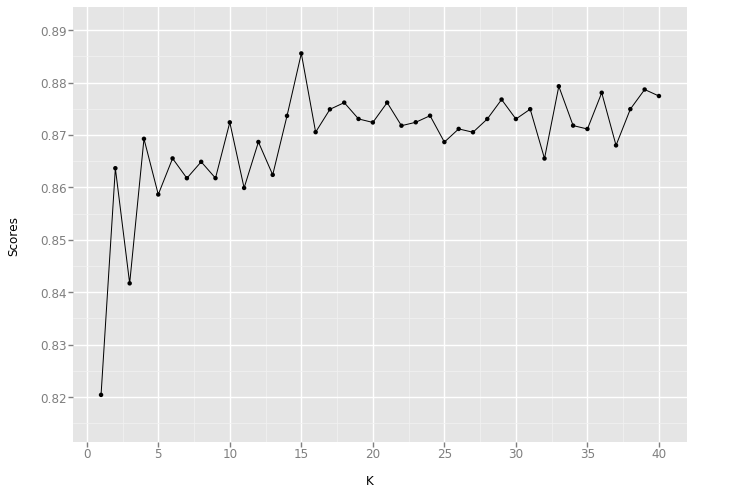

<ggplot: (-9223371910980871413)>

In [290]:
a=pd.DataFrame({'Scores':cv_scores,'K':myList})
ggplot(a,aes('K','Scores'))+geom_point()+geom_line()

(d) These accuracy scores look very promising compared to, say, classifying the wine using a coinflip. However, in binary classification problems, accuracy can be misleading if one class (say, bad wine) is much more common than another (say, good wine), this is, when the classes are unbalanced.

Print the percentage of wines that are labeled as "bad" in the dataset and plot the same boxplot as the last question (feel free to copy/paste), but this time draw a line across the plot denoting the accuracy of always guessing zero ("bad wine").

In [291]:
ggplot(a,aes('K','Scores'))+geom_point()+geom_line()+geom_abline(intercept=len(Y[Y==0])/len(Y),slope=0)

TypeError: object of type 'numpy.int32' has no len()

### Evaluation Metrics
When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. For this reason, we usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. These metrics were originally developed for clinical trials, so to keep with the standard terminology, we define "good" wines (value of 1) as "positive" and the "bad" wines (value of 0) as the "negatives". We then define the following:

P - number of positives in the sample.

N - number of negatives in the sample.

TP - number of true positives: how many of the "positive" guesses of the classifier are true.

FP - number of false positives: how many of the "positive" guesses of the classifier are actually negatives.

TN - number of true negatives; similarly, this is how many of the "negative" guesses of the classifier are true.

FN - number of false negatives; how many of the "negative" guesses are actually positives.

When calling the score functions in scikit-learn you obtained the default measure of efficiency, which is called accuracy. This is simply the ratio of successful guesses (both positives and negatives) across all samples:
accuracy=TP+TNP+N.
accuracy=TP+TNP+N.
In our case, when the two classes (good and bad wines) are very unbalanced in the sample, we should look for a better measure of efficiency.

Usually, the goal is to identify the members of the positive class (the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

The recall rate (also called the sensitivity or the true positive rate) is the ratio of true positive guesses among all positives:
recall=TP=TP+FN.
recall=TP=TP+FN.
The precision is the ratio of the true positive guesses over all the positive guesses:
precision=TP+FP.
precision=TP+FP.
(e) Describe in words what the difference is between precision and recall. Describe an application scenario where precision would be more important than recall, and one scenario where recall would be more important than precision.

YOUR ANSWER HERE.

Because precision and recall both provide valuable information about the quality of a classifier, we often want to combine them into a single general-purpose score. The F1 score is defined as the harmonic mean of recall and precision:
F1=2×recall×precisionrecall+precision.
F1=2×recall×precisionrecall+precision.
The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

(f) For this part, repeat the cross-validation analysis in part (b) changing the scoring parameter of the cross_val_score function such that the measure used is the F1 score. Comment briefly on these numbers. Hint: See the scikit-learn documentation for the options you can use for the scoring parameter.

In [ ]:
myList = list(range(1,41))
cv_scores = []
for k in myList:
    Rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(Rf, X,Y, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
cv_scores

In [ ]:
a=pd.DataFrame({'Scores':cv_scores,'K':myList})
ggplot(a,aes('K','Scores'))+geom_point()+geom_line()

### Problem 3: 
Classifier Calibration
Many classifiers, including random forest classifiers, can return prediction probabilities, which can be interpreted as the probability that a given prediction point falls into a given class (i.e., given the data X and a candidate class C, the prediction probability states P(Y=c|X)P(Y=c|X)). However, when the classes in the training data are unbalanced, as in this wine example, these prediction probabilities calculated by a classifier can be inaccurate. This is because many classifiers, again including random forests, do not have a way to internally adjust for this imbalance.

Despite the inaccuracy caused by imbalance, the prediction probabilities returned by a classifier can still be used to construct good predictions if we can choose the right way to turn a prediction probability into a prediction about the class that the datapoint belongs to. We call this task calibration.

If a classifier's prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when we call their predict method. When the probabilities are inaccurate, this does not work well, but we can still get good predictions by choosing a more appropriate cutoff. In this question, we will choose a cutoff by cross validation.

(a) Fit a random forest classifier to the wine data using 15 trees. Compute the predicted probabilities that the classifier assigned to each of the training examples (Hint: Use the predict_proba method of the classifier after fitting.). As a sanity test, construct a prediction based on these predicted probabilities that labels all wines with a predicted probability of being in class 1 > 0.5 with a 1 and 0 otherwise. For example, if originally probabilities =[0.1,0.4,0.5,0.6,0.7]=[0.1,0.4,0.5,0.6,0.7], the predictions should be [0,0,0,1,1][0,0,0,1,1]. Compare this to the output of the classifier's predict method, and show that they are the same.

In [ ]:
Rf = RandomForestClassifier(n_estimators=15)
Rf.fit(X,Y)
My_Predict=np.array([1 if y>.5 else 0 for y in Rf.predict_proba(X)[:,1]])
My_Predict==list(Rf.predict(X))

(b) Write a function cutoff_predict that takes a trained classifier, a data matrix X, and a cutoff, and generates predictions based on the classifier's predicted probability and the cutoff value, as you did in the previous question.

In [ ]:
def cutoff_P(Rf,X,cutoff):
    My_predict=[1 if y>cutoff else 0 for y in Rf.predict_proba(X)[:,1]]
    return My_predict
cutoff_P(Rf,X,.5)

(c) Using 10-fold cross validation find a cutoff in np.arange(0.1,0.9,0.1) that gives the best average F1 score when converting prediction probabilities from a 15-tree random forest classifier into predictions.

To help you with this task, we have provided you a function custom_f1 that takes a cutoff value and returns a function suitable for using as the scoring argument to cross_val_score. This function uses the cutoff_predict function that you defined in the previous question.

Using a boxplot, compare the F1 scores that correspond to each candidate cutoff value.

In [ ]:
def custom_f1(cutoff):
    def f1_cutoff(Rf, X, Y):
        ypred = cutoff_P(Rf,X,cutoff)
        return sklearn.metrics.f1_score(Y, ypred)
        
    return f1_cutoff

cv_scores=[]
l=np.arange(0.1,0.9,0.1)
for cutoff in l:
    Rf = RandomForestClassifier(n_estimators = 15)
    scores = cross_val_score(Rf, X, Y, cv=10, scoring=custom_f1(cutoff))   
    cv_scores.append(scores.mean())

cv_scores
a=pd.DataFrame({'Scores':cv_scores,'cutoff':l})

In [ ]:
ggplot(a,aes('cutoff','Scores'))+geom_point()+geom_line()

### Problem 4: Visualizing Classifiers Using Decision Surfaces
One common visual summary of a classifier is its decision surface. Recall that a trained classifier takes in features XX and tries to predict a target YY. We can visualize how the classifier translates different inputs X into a guess for Y by plotting the classifier's prediction probability (that is, for a given class cc, the assigned probability that Y=cY=c) as a function of the features XX. Most classifiers in scikit-learn have a method called predict_proba that computes this quantity for new examples after the classifier has been trained.

(a) Decision surface visualizations are really only meaningful if they are plotted against inputs XX that are one- or two-dimensional. So before we plot these surfaces, we will first find two "important" dimensions of XX to focus on. Recall that in the last homework we used SVD to perform a similar task. Here, we will use a different dimension reduction method based on random forests.

Random forests allow us to compute a heuristic for determining how "important" a feature is in predicting a target. This heuristic measures the change in prediction accuracy if we take a given feature and permute (scramble) it across the datapoints in the training set. The more the accuracy drops when the feature is permuted, the more "important" we can conclude the feature is. Importance can be a useful way to select a small number of features for visualization.

As you did in the last question, train a random forest classifier on the wine data using 15 trees. Use the feature_importances_ attribute of the classifier to obtain the relative importance of the features. These features are the columns of the dataframe. Show a simple bar plot showing the relative importance of the named features of the wines in the databes.

In [ ]:
Rf = RandomForestClassifier(n_estimators=15)

Rf.fit(X,Y)
importance_list=Rf.feature_importances_
importance_list

In [ ]:
importance = pd.DataFrame({'Importance':importance_list, 'Variables':Wine.columns})
importance


(b) Below, we have provided you with a function plot_decision_surface that plots a classifier's decision surface, taking as arguments a classifier object, a two-column feature matrix, and a target vector.

Using this function and the results from the "importance" analysis above, subset the data matrix to include just the two features of highest importance. Then plot the decision surfaces of a decision tree classifier, and a random forest classifier with number of trees set to 15, and a support vector machine with C set to 100, and gamma set to 1.0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()

In [ ]:
imp_cols = Rf.feature_importances_.argsort()[::-1][0:2]
X_imp = X[:,imp_cols]


In [ ]:
plot_decision_surface(DecisionTreeClassifier(), X_imp, Y)


In [ ]:
plot_decision_surface(RandomForestClassifier(n_estimators=15), X_imp, Y)

In [ ]:
plot_decision_surface(RandomForestClassifier(n_estimators=15), X_imp, Y)

In [ ]:
plot_decision_surface(sklearn.svm.SVC(C=100.0, gamma=1.0), X_imp, Y)

(d) The SVM implementation of sklearn has an optional parameter class_weight. This parameter is set to None per default, but it also provides an auto mode, which uses the values of the labels Y to automatically adjust weights inversely proportional to class frequencies. As done in sub-problem 4(b), draw the decision boundaries for two SVM classifiers. Use C=1.0, and gamma=1.0 for both models, but for the first SVM set class_weigth to None, and for the second SVM set class_weigth to 'auto'. (Hint: None is a keyword in Python, whereas the 'auto' is a String and needs the quotation marks.)

In [ ]:
 plot_decision_surface(sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight=None), X_imp, Y)

In [ ]:
plot_decision_surface(sklearn.svm.SVC(C=1.0, gamma=1.0, class_weight='balanced'),X_imp,Y)